In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger


ImportError: cannot import name 'BaseEstimator' from 'qiskit.primitives' (c:\Users\Polyana\Documents\GitHub\BQC-QML\.venv\Lib\site-packages\qiskit\primitives\__init__.py)

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


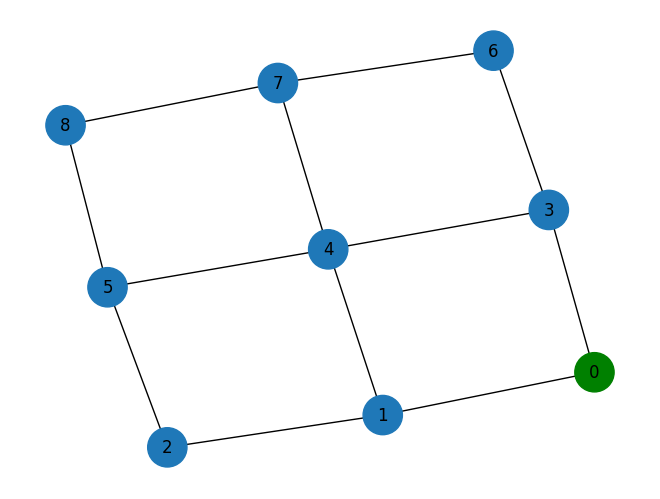

In [ ]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

In [ ]:
quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=5, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=10,scenario=2,circuit_depth=circuit_depth)

2025-04-25 10:21:24,206: Circuito aleatório gerado com 5 qubits e 20 portas. Instruções sobre o circuito.
2025-04-25 10:21:24,206: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2025-04-25 10:21:24,207: Instrução: {'operation': 'swap', 'qubits': [0, 3]}
2025-04-25 10:21:24,208: Instrução: {'operation': 'x', 'qubits': [4]}
2025-04-25 10:21:24,208: Instrução: {'operation': 'cz', 'qubits': [1, 2]}
2025-04-25 10:21:24,209: Instrução: {'operation': 'z', 'qubits': [1]}
2025-04-25 10:21:24,209: Instrução: {'operation': 'h', 'qubits': [3]}
2025-04-25 10:21:24,210: Instrução: {'operation': 's', 'qubits': [3]}
2025-04-25 10:21:24,210: Instrução: {'operation': 'z', 'qubits': [2]}
2025-04-25 10:21:24,211: Instrução: {'operation': 'cx', 'qubits': [2, 0]}
2025-04-25 10:21:24,211: Instrução: {'operation': 'cx', 'qubits': [1, 3]}
2025-04-25 10:21:24,212: Instrução: {'operation': 'swap', 'qubits': [1, 4]}
2025-04-25 10:21:24,212: Instrução: {'operation': 'z', 'qubits': [4]}
2025-04-25 10:21:24,213: I

                         ┌───┐             ┌───┐
q_0: ───────X────────────┤ X ├──────────■──┤ Z ├
     ┌───┐  │       ┌───┐└─┬─┘          │  ├───┤
q_1: ┤ X ├──┼────■──┤ Z ├──┼────■───X───■──┤ T ├
     └─┬─┘  │    │  ├───┤  │    │   │ ┌───┐├───┤
q_2: ──■────┼────■──┤ Z ├──■────┼───┼─┤ H ├┤ X ├
            │  ┌───┐├───┤     ┌─┴─┐ │ ├───┤├───┤
q_3: ───────X──┤ H ├┤ S ├─────┤ X ├─┼─┤ Z ├┤ Y ├
          ┌───┐└───┘└───┘     └───┘ │ ├───┤├───┤
q_4: ─────┤ X ├─────────────────────X─┤ Z ├┤ H ├
          └───┘                       └───┘└───┘


2025-04-25 10:21:24,297: Produto das fidelidades para rota [6, 3, 0]: 0.9860906369990011
2025-04-25 10:21:24,298: Fidelidade atual da rota: 0.9860906369990011
2025-04-25 10:21:24,299: Fidelidade final: 0.9861 (F_qubit: 0.9044 * F_rota: 0.9861)
2025-04-25 10:21:24,300: Fidelidade do EPR 6->3: 0.9920279440699441
2025-04-25 10:21:24,301: Fidelidade do EPR 3->0: 0.9920279440699441
2025-04-25 10:21:24,301: Produto das fidelidades para rota [6, 3, 0]: 0.9841194418156402
2025-04-25 10:21:24,303: Fidelidade atual da rota: 0.9841194418156402
2025-04-25 10:21:24,304: Fidelidade final: 0.9841 (F_qubit: 0.9102 * F_rota: 0.9841)
2025-04-25 10:21:24,305: Fidelidade do EPR 6->3: 0.9910359161258742
2025-04-25 10:21:24,306: Fidelidade do EPR 3->0: 0.9910359161258742
2025-04-25 10:21:24,307: Produto das fidelidades para rota [6, 3, 0]: 0.9821521870514507
2025-04-25 10:21:24,308: Fidelidade atual da rota: 0.9821521870514507
2025-04-25 10:21:24,311: Fidelidade final: 0.9822 (F_qubit: 0.8996 * F_rota: 0.98

Tempo de Operação: 7
